In [2]:
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot
import hvplot.pandas
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import json
import time
from config import api_key
from scipy.stats import linregress
from pprint import pprint

In [3]:
artist = 'DepecheMode'
locale = 'en-us'
segment = 'Music'

events = requests.get(f'https://app.ticketmaster.com/discovery/v2/events.json?keyword={artist}&segment={segment}&apikey={api_key}').json()

In [ ]:
#open('test_output.json', 'w').write(json.dumps(events, indent=4))

In [4]:
# Create empty lists for each column
artist = []
date = []
city = []
state = []
country_list = []
min_price = []
max_price = []
latitude = []
longitude = []

for x in events['_embedded']['events']:
    
    artist_name = x['name']
    event_date = x['dates']['start']['localDate']
    event_city = x['_embedded']['venues'][0]['city']['name']
    country = x['_embedded']['venues'][0]['country']['countryCode']
    lat = x['_embedded']['venues'][0]['location']['latitude']
    long = x['_embedded']['venues'][0]['location']['longitude']

    artist.append(artist_name)
    date.append(event_date)
    city.append(event_city)
    country_list.append(country)
    
    if 'state' in x['_embedded']['venues'][0]:
        state.append(x['_embedded']['venues'][0]['state']['stateCode'])
    else:
        state.append(None)

    latitude.append(lat)
    longitude.append(long)

    if 'priceRanges' in x:
        min_price.append(x['priceRanges'][0]['min'])
        max_price.append(x['priceRanges'][0]['max'])
    else:
        min_price.append(None)
        max_price.append(None)

# Create the DataFrame using the lists
dm_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'Date': date,
    'City': city,
    'State': state,
    'Country': country_list,
    'Min Price': min_price,
    'Max Price': max_price,
    'Lat': latitude,
    'Lon': longitude
})

# Display the DataFrame
dm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
0,Depeche Mode: Memento Mori Tour,2023-12-01,Las Vegas,NV,US,NaN,NaN,36.124401,-115.145103
1,Depeche Mode: Memento Mori Tour,2023-12-03,San Francisco,CA,US,59.00,314.0,37.76797,-122.387464
2,Depeche Mode: Memento Mori Tour,2023-12-15,Los Angeles,CA,US,70.00,370.0,34.043003,-118.267253
3,Depeche Mode: Memento Mori Tour,2023-12-10,Inglewood,CA,US,49.50,259.5,33.9583,-118.341868
4,Depeche Mode: Memento Mori Tour,2023-11-26,Seattle,WA,US,69.00,274.0,47.6221261,-122.35401604
5,Depeche Mode: Memento Mori Tour,2023-11-28,Portland,OR,US,45.50,235.5,45.53118896,-122.66645813
6,Depeche Mode: Memento Mori Tour,2023-12-08,San Diego,CA,US,NaN,NaN,32.777599,-117.195999
7,Depeche Mode: Memento Mori Tour,2023-12-17,Los Angeles,CA,US,55.00,180.0,34.043003,-118.267253
8,Depeche Mode: Memento Mori Tour,2023-12-12,Inglewood,CA,US,44.50,249.5,33.9583,-118.341868
9,Depeche Mode: Memento Mori Tour,2023-12-06,San Diego,CA,US,NaN,NaN,32.777599,-117.195999


In [5]:
dm_events_df = dm_events_df.loc[dm_events_df["Country"] == "US"]

In [6]:
dm_events_df = dm_events_df.astype({
    "Artist & Tour": str,
    "Date": str,
    "City": str,
    "State": str,
    "Country": str,
    "Min Price": float,
    "Max Price": float,
    "Lat": float,
    "Lon": float
})

In [7]:
dm_events_df = dm_events_df.sort_values("Date")
dm_events_df

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
10,Depeche Mode: Memento Mori Tour,2023-11-18,Salt Lake City,UT,US,NaN,NaN,40.756599,-111.899200
11,Depeche Mode: Memento Mori Tour,2023-11-18,Salt Lake City,UT,US,NaN,NaN,40.767798,-111.901096
4,Depeche Mode: Memento Mori Tour,2023-11-26,Seattle,WA,US,69.0,274.0,47.622126,-122.354016
5,Depeche Mode: Memento Mori Tour,2023-11-28,Portland,OR,US,45.5,235.5,45.531189,-122.666458
0,Depeche Mode: Memento Mori Tour,2023-12-01,Las Vegas,NV,US,NaN,NaN,36.124401,-115.145103
14,Depeche Mode: Memento Mori Tour,2023-12-01,Las Vegas,NV,US,NaN,NaN,36.102807,-115.178313
1,Depeche Mode: Memento Mori Tour,2023-12-03,San Francisco,CA,US,59.0,314.0,37.767970,-122.387464
9,Depeche Mode: Memento Mori Tour,2023-12-06,San Diego,CA,US,NaN,NaN,32.777599,-117.195999
15,Depeche Mode: Memento Mori Tour,2023-12-06,San Diego,CA,US,NaN,NaN,32.755267,-117.212196
6,Depeche Mode: Memento Mori Tour,2023-12-08,San Diego,CA,US,NaN,NaN,32.777599,-117.195999


In [8]:
# Drop any rows with null values
dm_clean = dm_events_df.dropna()

# Display sample data
dm_clean

,Artist & Tour,Date,City,State,Country,Min Price,Max Price,Lat,Lon
4,Depeche Mode: Memento Mori Tour,2023-11-26,Seattle,WA,US,69.0,274.0,47.622126,-122.354016
5,Depeche Mode: Memento Mori Tour,2023-11-28,Portland,OR,US,45.5,235.5,45.531189,-122.666458
1,Depeche Mode: Memento Mori Tour,2023-12-03,San Francisco,CA,US,59.0,314.0,37.767970,-122.387464
3,Depeche Mode: Memento Mori Tour,2023-12-10,Inglewood,CA,US,49.5,259.5,33.958300,-118.341868
8,Depeche Mode: Memento Mori Tour,2023-12-12,Inglewood,CA,US,44.5,249.5,33.958300,-118.341868
2,Depeche Mode: Memento Mori Tour,2023-12-15,Los Angeles,CA,US,70.0,370.0,34.043003,-118.267253
7,Depeche Mode: Memento Mori Tour,2023-12-17,Los Angeles,CA,US,55.0,180.0,34.043003,-118.267253


In [9]:
dm_clean.to_csv('DepecheMode.csv')

In [83]:
dm_clean.to_excel('DepecheMode.xlsx')

In [10]:
dm_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 10 to 7
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist & Tour  15 non-null     object 
 1   Date           15 non-null     object 
 2   City           15 non-null     object 
 3   State          15 non-null     object 
 4   Country        15 non-null     object 
 5   Min Price      7 non-null      float64
 6   Max Price      7 non-null      float64
 7   Lat            15 non-null     float64
 8   Lon            15 non-null     float64
dtypes: float64(4), object(5)
memory usage: 1.2+ KB


In [11]:
# Configure the map plot
map_plot = dm_events_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    color = "City",
    frame_width = 800,
    frame_height = 600
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City)

In [12]:
bar_dm_events_df = pd.DataFrame({
    'Artist & Tour': artist,
    'City': city,
    "Country": country_list,
    'Min Price': min_price,
    'Max Price': max_price
})

# Display the DataFrame
bar_dm_events_df

,Artist & Tour,City,Country,Min Price,Max Price
0,Depeche Mode: Memento Mori Tour,Las Vegas,US,NaN,NaN
1,Depeche Mode: Memento Mori Tour,San Francisco,US,59.00,314.0
2,Depeche Mode: Memento Mori Tour,Los Angeles,US,70.00,370.0
3,Depeche Mode: Memento Mori Tour,Inglewood,US,49.50,259.5
4,Depeche Mode: Memento Mori Tour,Seattle,US,69.00,274.0
5,Depeche Mode: Memento Mori Tour,Portland,US,45.50,235.5
6,Depeche Mode: Memento Mori Tour,San Diego,US,NaN,NaN
7,Depeche Mode: Memento Mori Tour,Los Angeles,US,55.00,180.0
8,Depeche Mode: Memento Mori Tour,Inglewood,US,44.50,249.5
9,Depeche Mode: Memento Mori Tour,San Diego,US,NaN,NaN


In [13]:
bar_dm_events_df = bar_dm_events_df.loc[bar_dm_events_df["Country"] == "US"]

In [14]:
bar_dm_events_df = bar_dm_events_df.loc[bar_dm_events_df["Artist & Tour"] == "Depeche Mode: Memento Mori Tour"]

In [15]:
# Drop any rows with null values
bar_dm_clean = bar_dm_events_df.dropna()

# Display sample data
bar_dm_clean

,Artist & Tour,City,Country,Min Price,Max Price
1,Depeche Mode: Memento Mori Tour,San Francisco,US,59.0,314.0
2,Depeche Mode: Memento Mori Tour,Los Angeles,US,70.0,370.0
3,Depeche Mode: Memento Mori Tour,Inglewood,US,49.5,259.5
4,Depeche Mode: Memento Mori Tour,Seattle,US,69.0,274.0
5,Depeche Mode: Memento Mori Tour,Portland,US,45.5,235.5
7,Depeche Mode: Memento Mori Tour,Los Angeles,US,55.0,180.0
8,Depeche Mode: Memento Mori Tour,Inglewood,US,44.5,249.5


In [21]:
#bar_dm_clean = bar_dm_clean.loc[bar_dm_clean["State"]=="MN"]
bar_dm_clean.set_index(["City"],inplace=True)
bar_dm_clean

,Country,Min Price,Max Price
City,,,
San Francisco,US,59.0,314.0
Los Angeles,US,70.0,370.0
Inglewood,US,49.5,259.5
Seattle,US,69.0,274.0
Portland,US,45.5,235.5
Los Angeles,US,55.0,180.0
Inglewood,US,44.5,249.5


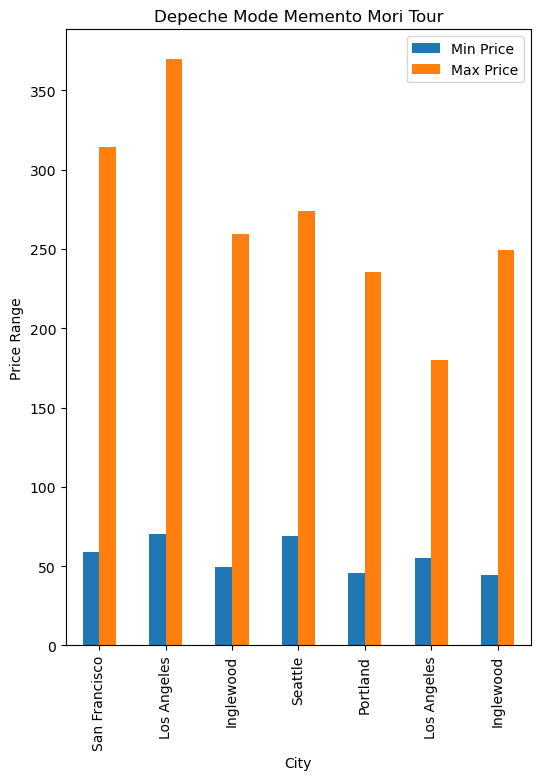

<Figure size 640x480 with 0 Axes>

In [22]:
# Create a bar chart 
max_chart = bar_dm_clean.plot(kind='bar', figsize=(6,8))

# Add labels
plt.xlabel('City')
plt.ylabel('Price Range')
plt.title('Depeche Mode Memento Mori Tour')

plt.savefig("output_data/FigDM.png")

plt.show()
plt.tight_layout()

In [92]:
# Save the figure
plt.savefig("output_data/FigDM.png")

<Figure size 640x480 with 0 Axes>